# Project: Factors in predicting medical appointment "no-show" rates
#### Lyubomira Derelieva 
November 2022





## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> "No-show" medical appointments indicate that a patient has not attended a scheduled appointment without giving any prior notification (within a set time limit, such as 24 hours in advance). 

> "No-shows" result in a loss of time and resources. Thus, reducing patient no-show rates is essential for improving the efficiency and effectiveness of healthcare providers, leading to better patient outcomes and continuity of care. (See: Marbouh D. et al., Evaluating the Impact of Patient No-Shows on Service Quality, Risk Management Healthcare Policy. 2020; 13: 509–517, available at: www.ncbi.nlm.nih.gov/pmc/articles/PMC7280239/)

> To inform such efforts, this analysis aims to discover trends in patient no-show rates by looking at data from 110,527 medical appointments in Brazil in 2015 and 2016.

> The analysis will answer the following question: 
> - What factors are important to know to predict if a patient will show up for their scheduled appointment? 

> The data used in the analysis is available in a .csv file on www.kaggle.com. It is structured by 14 variables: 

| number | variable name | description |
| :- | :- | :- |
| 1 | 'patient ID' | unique patient ID |
| 2 | 'appointment ID' | unique appointment ID |
| 3 | 'gender' | patient gender - female or male |
| 4 | 'scheduled day' | day the patient set up their appointment |
| 5 | 'appointment day' | day of the appointment |
| 6 | 'age' | patient's age |
| 7 | 'neighbourhood' | hospital location |
| 8 | 'scholarship' | patient enrolment in the Brazilian social welfare program Bolsa Família (2003-2021) |
| 9 | 'hypertension' | if the patient has high blood pressure |
| 10 | 'diabetes' | if the patient has diabetes |
| 11 | 'alcoholism' | if the patient has alcohol abuse problems |
| 12 | 'handicap' | if the patient has a disability
| 13 | 'SMS received' | if the patient received a reminder on their mobile phone |
| 14 | 'no show' | if the patient showed up (‘No’ = patient showed up, ‘Yes’ = the patient did not show up) |


<a id='wrangling'></a>
## Data Wrangling

> This section includes two parts:
> - **General Properties**: load in the data, get acquainted with it and check for cleanliness.
> - **Clean Data**: trim and clean the dataset for analysis.

### General Properties

In [1]:
# import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

In [2]:
# load data and print out the first five lines to get a first impression of the dataset

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> Looking at the first five rows of the dataset, we notice that:
> - we have information both about the characteristics of the patient (age, gender, health condition) and about the characteristics of the appointment (e.g. place, date) that we can use in the analysis.
> - the column labels need to be updated
> - the schedule day data includes a timestamp, while the appointment day doesn't. So we don't know the time of the appointment.
> The 'no show' variable is in yes/no, rather than 1 and 0 like the other variables.

In [3]:
# check number of rows and columns

df.shape

(110527, 14)

> The dataset includes information about 110,527 appointments and contains 14 appointment variables.

In [4]:
# check for missing values and see the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> The dataset doesn't have any missing values.

> There is a need to change some datatypes. The timestamp variables ('ScheduledDay' and 'AppointmentDay') are currently strings. We need to transform them into datetime data types for analysis.

In [5]:
# double check for null values

df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
# check for duplicates

df.duplicated().sum()

0

> The data is generally clean with no null or duplcate values. 

In [7]:
# check the number of unique values per variable

df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

> It's important to note:
> - some patients repeat.
> - there is a signficant difference in the number of schedule and appointment days. Part of the reason is probably because the schedule days have timestamps, while all appointment days are set at 00:00:00.
> - 'Handcap' has 5 unique values unlike the other patient characteristics which only have 2.


In [8]:
# understand the timespan difference of 'schedule day' and 'appointment day' by finding the minimum and 
# maximum values for both variables

# find the first scheduling day in the dataset

df.ScheduledDay.unique().min()

'2015-11-10T07:13:56Z'

In [9]:
# find the last scheduling day

df.ScheduledDay.unique().max()

'2016-06-08T20:07:23Z'

In [10]:
# find the first appointment day

df.AppointmentDay.unique().min()

'2016-04-29T00:00:00Z'

In [11]:
# find the last appointment day

df.AppointmentDay.unique().max()

'2016-06-08T00:00:00Z'

> This dataset includes instances of patients scheduling appointments between November 10 2015 and June 8 2016 
> (= 211 days), and appointments scheduled between June 8 2016 and April 29 2016 (= 40 days).

> It doesn't include any information about the time of the scheduled appointment, so we cannot check if appointments at certain periods (e.g. morning or afternoon) are more likely to be 'no-shows'.

In [12]:
# understand why the 'Handcap' variable has 5 unique variables (rather than just two 1 and 0 as the other 
# similar variables)

df.Handcap.unique()

array([0, 1, 2, 3, 4])

> It appears that disability is coded as a scale, with 0 being 'no disability' and 1-4 referring to types of disability. As the dataset does not include any additional information about this variable, it is safest to read it as 0 = 'without any disability' and 1-4 = 'with disability' in the analysis.

> Before looking at the descriptive statistics, change the "no-show" Yes/No values to 1/0, so they appear in the statistics.

In [13]:
# change Yes/No to 1/0 in 'no-show' column

df['No-show'] = df['No-show'].map({'Yes': 1, 'No': 0})

In [14]:
# check result

df['No-show'].unique()

array([0, 1])

In [15]:
# look at the descriptive statistics

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


> A profile of the patients in the dataset emerges:

> - Most people attended their appointments (the average no-show rate is 20%).
> - The average patient age is 37. The majority of patients are adults between the ages of 18 and 55. The maximum age is 115. There is at least one erroneous value we need to clean (minimum age: - 1).
> - 10% were members of the Bolsa Familia welfare program.
> - 20% had high blood pressure, 7% diabetes and 3% alcoholism.
> - 2% had a disability.
> - 32% received an SMS reminder.


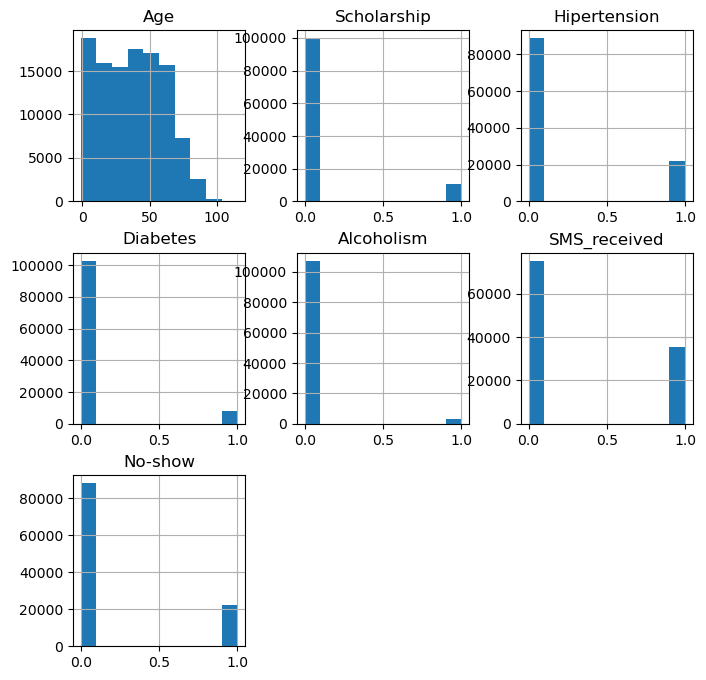

In [16]:
# chart a histogram of the distribution of values by each variable to further understand the data
# leave out patient_id and appointment_id as they're not useful in the analysis

df.hist(column=["Age", "Scholarship", "Hipertension", "Diabetes", "Alcoholism", "SMS_received", "No-show"], figsize=(8,8));


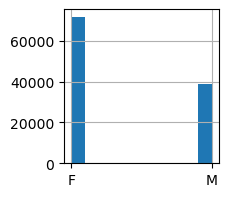

In [17]:
# see distribution by gender

df.Gender.hist(figsize=(2,2));


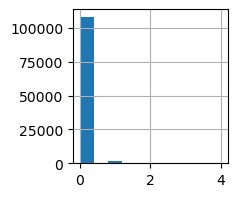

In [18]:
# see distribution by disability

df.Handcap.hist(figsize=(2,2));

> Predominantly, patients in the dataset:
> - attended their scheduled appointment;
> - are under the age of 50;
> - are female;
> - do not have a disability;
> - are not beneficiaries of the Bolsa Familia social welfare scheme;
> - without high blood pressure, diabetes or alcoholism;
> - did not receive an SMS reminder.


#### Data cleaning conclusion:

> The data appears to be rather clean. It doesn't include any duplicates or missing values. The cleaning process will include:

> - Renaming columns.
> - Creating a new column calculating the difference between the scheduling and appointment dates.
> - Updating datatypes.
> - Deleting negative values.
> - Using bins to reduce 'disability' categories from 5 to 2.

### Data Cleaning

#### Rename columns

In [19]:
# change all column labels to snake case for consistency and readability 

df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True)

In [20]:
# fix misspelling in 'Hipertension' 
# replace 'Handcap' with the correct term 'disability'
# separate patientid and appointmentid labels

df.rename({'patientid':'patient_id', 'appointmentid':'appointment_id','scheduledday':'scheduled_day', 'appointmentday':'appointment_day', 'hipertension':'hypertension', 'handcap':'disability'}, axis=1, inplace=True)

In [21]:
#check result

df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,disability,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


#### Create new column calculating the time between scheduling and appointment
> Calculating the difference in days would allow us to see if a longer period of time between the scheduling of the appointment and its taking place is associated with higher no-show rates. 

> We won't be looking at the times since we don't know the time of the appointment which would have been interesting and the time of scheduling seems less relevant.

In [22]:
# create two new columns only containing the dates 

df['appointment_date'] = pd.to_datetime(df['appointment_day']).dt.date
df['scheduling_date'] = pd.to_datetime(df['scheduled_day']).dt.date

In [23]:
# drop redundant columns 'ScheduledDay' and 'AppointmentDay'. 

df.drop(['scheduled_day', 'appointment_day'], axis=1, inplace=True)

In [24]:
# check results

df.head()

,patient_id,appointment_id,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,disability,sms_received,no_show,appointment_date,scheduling_date
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29,2016-04-29
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29,2016-04-29
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29,2016-04-29
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29,2016-04-29
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29,2016-04-29


In [25]:
# change the datatype of the two new columns to datetime for analysis

df['scheduling_date'] = pd.to_datetime(df['scheduling_date'])
df['appointment_date'] = pd.to_datetime(df['appointment_date'])


In [26]:
# check that the change has been executed correctly

df.dtypes

patient_id                 float64
appointment_id               int64
gender                      object
age                          int64
neighbourhood               object
scholarship                  int64
hypertension                 int64
diabetes                     int64
alcoholism                   int64
disability                   int64
sms_received                 int64
no_show                      int64
appointment_date    datetime64[ns]
scheduling_date     datetime64[ns]
dtype: object

In [27]:
# create a new column calculating the difference in days between the time of scheduling 
# the appointment and the appointment

df['diff_days'] = (df['appointment_date'] - df['scheduling_date']).dt.days

In [28]:
# check result

df.head()

,patient_id,appointment_id,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,disability,sms_received,no_show,appointment_date,scheduling_date,diff_days
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29,2016-04-29,0
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29,2016-04-29,0
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29,2016-04-29,0
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29,2016-04-29,0
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29,2016-04-29,0


In [29]:
# check the minimum and maximum values if the number of days fit in the maximum period between June 8 2016 
# and November 10 2015 and if there are any negative values

df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,disability,sms_received,no_show,diff_days
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.201933,10.183702
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444,15.254996
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,179.000000


> This dataset includes instances of patients scheduling appointments between November 10 2015 and June 8 2016 
> (= 211 days), and appointments scheduled between April 29 2016 and June 8 2016 (= 40 days).
> The maximum difference in dates is 179 which is within 211 but the minimum is -6 which indicates an error which should be cleaned.

#### Delete negative values

In [30]:
# calculate the number of negative values in the diff_days column

df.diff_days.lt(0).sum()

5

In [31]:
# delete negative values in the diff_days column

df.drop(df[df['diff_days'] < 0].index, inplace = True)

In [32]:
# check if all negative values have been deleted

df.diff_days.unique().min()

0

> Successfully deleted 5 negative values in diff_days.
> Next, let's remove the negative values for 'age'.

In [33]:
# see the number of negative values for 'age'

df.age.lt(0).sum()

1

In [34]:
# remove the single negative value for 'age'

df.drop(df[df['age'] < 0].index, inplace = True)

In [35]:
# check results

df.age.min()

0

In [36]:
# see the number of remaining values

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   patient_id        110521 non-null  float64       
 1   appointment_id    110521 non-null  int64         
 2   gender            110521 non-null  object        
 3   age               110521 non-null  int64         
 4   neighbourhood     110521 non-null  object        
 5   scholarship       110521 non-null  int64         
 6   hypertension      110521 non-null  int64         
 7   diabetes          110521 non-null  int64         
 8   alcoholism        110521 non-null  int64         
 9   disability        110521 non-null  int64         
 10  sms_received      110521 non-null  int64         
 11  no_show           110521 non-null  int64         
 12  appointment_date  110521 non-null  datetime64[ns]
 13  scheduling_date   110521 non-null  datetime64[ns]
 14  diff

> After cleaning the dataset, we are left with 110,521 observations for analysis.

#### Disability: reduce 5 to 2 categories (without/with a disability)

In [37]:
# create a new column including 2 bins grouping the 5 values for 'disability':
# bin 0 (includes all 0 values = patient without any disability) and 
# bin 1 (include values 1-5 = patient with a disability)

bin_edges = [0, 1, 5]
bin_names = ['0', '1']
df['disability_new'] = pd.cut(df['disability'], bin_edges, labels=bin_names, include_lowest=True)

In [38]:
# check result

df.head()

,patient_id,appointment_id,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,disability,sms_received,no_show,appointment_date,scheduling_date,diff_days,disability_new
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29,2016-04-29,0,0
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29,2016-04-29,0,0
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29,2016-04-29,0,0
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29,2016-04-29,0,0
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29,2016-04-29,0,0


In [39]:
# check that there are only 2 possible values

df.disability_new.unique()

['0', '1']
Categories (2, object): ['0' < '1']

In [40]:
# drop original disability column, which will not be used in the analysis

df.drop(['disability'], axis=1, inplace=True)

In [41]:
# check result

df.head()

,patient_id,appointment_id,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show,appointment_date,scheduling_date,diff_days,disability_new
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,2016-04-29,2016-04-29,0,0
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,2016-04-29,2016-04-29,0,0
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,2016-04-29,2016-04-29,0,0
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,2016-04-29,2016-04-29,0,0
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,2016-04-29,2016-04-29,0,0


#### Update datatypes

> To facilitate analysis, let's update the datatypes for gender and disability to int64.

In [42]:
df.dtypes

patient_id                 float64
appointment_id               int64
gender                      object
age                          int64
neighbourhood               object
scholarship                  int64
hypertension                 int64
diabetes                     int64
alcoholism                   int64
sms_received                 int64
no_show                      int64
appointment_date    datetime64[ns]
scheduling_date     datetime64[ns]
diff_days                    int64
disability_new            category
dtype: object

In [43]:
# change datatype of gender from object to int64

# add new column 'female' with Boolean values
df['female'] = (df.gender == 'F')

# change Boolean True/False to 1/0 (1 = is female & 0 = is not female)
df.female = df.female*1

In [44]:
df.head()

,patient_id,appointment_id,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show,appointment_date,scheduling_date,diff_days,disability_new,female
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,2016-04-29,2016-04-29,0,0,1
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,2016-04-29,2016-04-29,0,0,0
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,2016-04-29,2016-04-29,0,0,1
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,2016-04-29,2016-04-29,0,0,1
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,2016-04-29,2016-04-29,0,0,1


In [45]:
# change datatype of disability_new from category to int64

df["disability_new"] = df["disability_new"].astype("int64") 

In [46]:
# check results

df.dtypes

patient_id                 float64
appointment_id               int64
gender                      object
age                          int64
neighbourhood               object
scholarship                  int64
hypertension                 int64
diabetes                     int64
alcoholism                   int64
sms_received                 int64
no_show                      int64
appointment_date    datetime64[ns]
scheduling_date     datetime64[ns]
diff_days                    int64
disability_new               int64
female                       int64
dtype: object

In [47]:
df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show,diff_days,disability_new,female
count,1.105210e+05,1.105210e+05,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,1.474906e+14,5.675304e+06,37.089386,0.098271,0.197257,0.071869,0.030401,0.321043,0.201898,10.184345,0.001801,0.649976
std,2.560860e+14,7.129691e+04,23.109885,0.297682,0.397929,0.258272,0.171690,0.466879,0.401419,15.255153,0.042395,0.476979
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172457e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173185e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.000000
75%,9.438963e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,1.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis

> Now that the data has been cleaned and prepared, I will analyze it to answer the question "What factors are important to know to predict if a patient will show up for their scheduled appointment?"
> Let's begin by comparing the characteristics of the no-show appointments with the rest.

In [48]:
# create masks for the no-show and show-up categories

noshow = df['no_show'] == True
show = df['no_show'] == False

In [49]:
# compare characteristics of no-show appointments with the show-up appointments

noshow_appointments = df.query('no_show == 1')
show_appointments = df.query('no_show == 0')

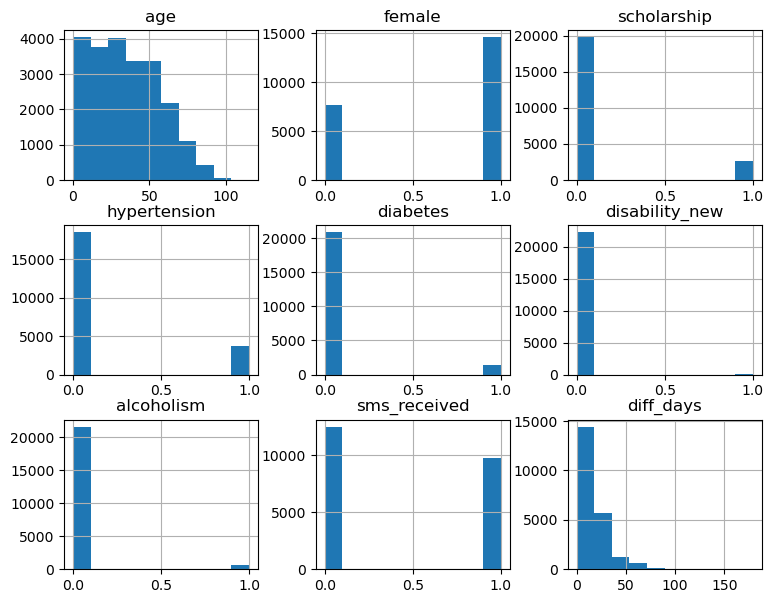

In [50]:
# see distribution of characteristics in "no-show" appointments

noshow_appointments.hist(column=["age", "female", "scholarship", "hypertension", "diabetes", "disability_new", "alcoholism", "sms_received", "diff_days"], figsize=(9,7));


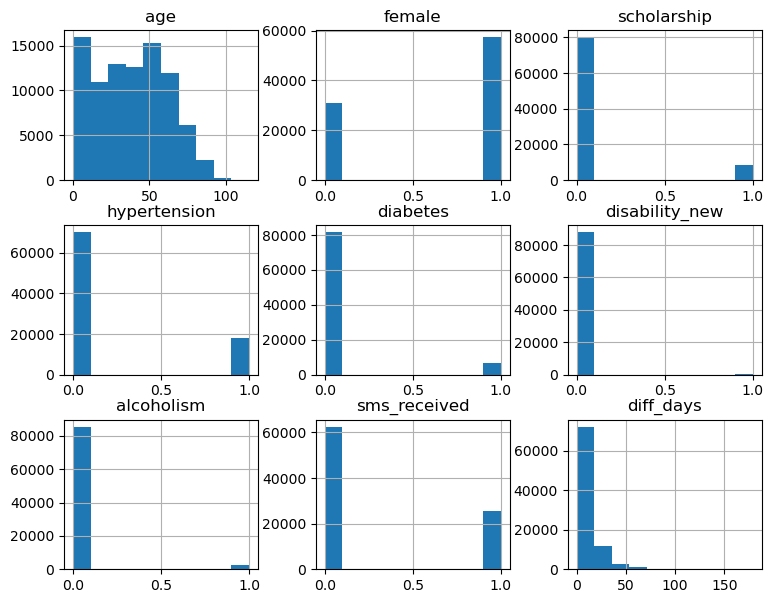

In [51]:
# see distribution of characteristics of "show-up" appointments

show_appointments.hist(column=["age", "female", "scholarship", "hypertension", "diabetes", "disability_new", "alcoholism", "sms_received", "diff_days"], figsize=(9,7));


> Comparing the histograms of the two groups:
> - a greater number of younger people fall into the "no-show" category;
> - a greater proportion of no-show patients received an SMS reminder compared to the proportion among show-up patients (which is counter-intuitive and we'll look at it in more detail below);
> - there is a similar distribution for gender, beneficiary of the Bolsa Familia social welfare scheme, hypertension, diabetes, disability, alcoholism and the number of days between scheduling and the appointment.

> In the next section we'll look at each of these characteristics in turn.

> First, we'll see if any of the the **patient characteristics** affect "no-show" rates:
> - age
> - gender
> - social welfare support (Bolsa Familia)
> - high blood pressure, diabetes, alcoholism
> - disability
> - repeat patients

> Second, we'll look at whether the **appointment characteristics** affect "no-show" rates:
> - reminder received
> - neighbourhood

#### Is age a factor affecting no-show rates?


In [52]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


In [53]:
df.age[noshow].mean()


34.31787218786412

In [54]:
df.age[show].mean()


37.790504154999034

> The average age of "no-show" appointments is 34 years - slightly younger than the "show-up" appointments of 38 years. This confirms the histogram observation that slightly more young people are present in the "no-show" group.


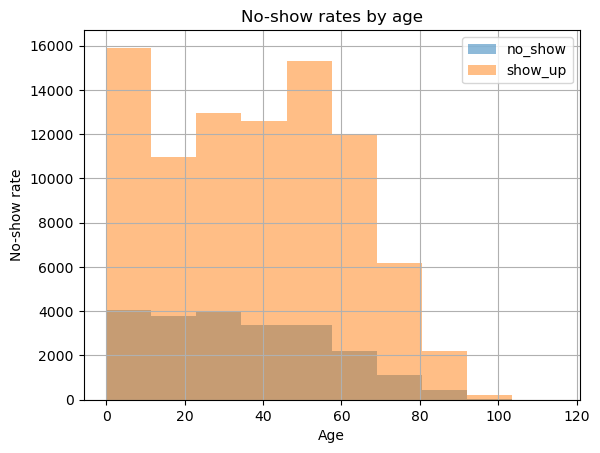

In [55]:
# association age and appointment attendance

ax = df.age[noshow].hist(alpha=0.5, label='no_show')
ax = df.age[show].hist(alpha=0.5, label='show_up')
ax.set(xlabel="Age", ylabel="No-show rate", title='No-show rates by age')
plt.legend();


> There does not appear to be a strong association between age and attendance rates. Both are skewed to the right.

In [56]:
# define a function to find the average "no-show" rates for the patient characteristics: gender, scholarship, 
# hypertension, diabetes, disability, and alcoholism


def avgnoshow(characteristic):
    '''finds the average no-show rates by patient characteristic'''
    return df.groupby(characteristic).no_show.mean()


#### Is gender a factor affecting no-show rates?


In [57]:
avgnoshow('gender')

gender
F    0.203115
M    0.199638
Name: no_show, dtype: float64

In [58]:
# define a function to plot the average "no-show" rates for the characteristics: gender, scholarship, hypertension,
# diabetes, disability, alcoholism

def barpltavgnoshow (x):
    '''groups the no-show rates by a patient characteristic and plots the average no-show rate in a bar plot'''
    ax = df.groupby(x).no_show.mean().plot(kind='bar', figsize=[4, 4], title=f'No-show rates by {x}')
    ax.set(xlabel=x.title(), ylabel="No-show rate")
    ax.axhline(df.no_show.mean(), color='red', linewidth=2, label='Average no-show rate');
    plt.legend(loc='lower right')
    return ax
    

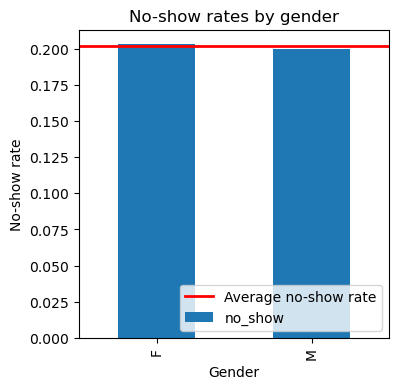

In [59]:
# plot comparison of average no-show rates by gender

barpltavgnoshow('gender');

> Women tend to have higher no-show rates than men and are over the average no-show rates. There does not appear to be a strong association between gender and attendance rates, however, women's no-show rates being only 2% higher than men's. 

#### Is social welfare support (Bolsa Familia) a factor affecting no-show rates?


In [60]:
avgnoshow('scholarship')

scholarship
0    0.198033
1    0.237363
Name: no_show, dtype: float64

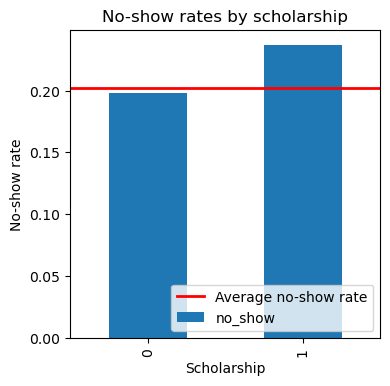

In [61]:
# plot comparison of average no-show rates for patients beneficiaries and non-beneficiaries of the Bolsa Familia social welfare program

barpltavgnoshow('scholarship');


> Beneficiaries of the Bolsa Familia program have 18% higher no-show rates. This is a potentially important observation, bringing attention to potential obstacles beneficiaires of social welfare may face in accessing healthcare.

#### Is high blood pressure a factor affecting no-show rates?

In [62]:
# compare the average no-show rates for patients with and without high blood pressure

avgnoshow('hypertension')

hypertension
0    0.208995
1    0.173020
Name: no_show, dtype: float64

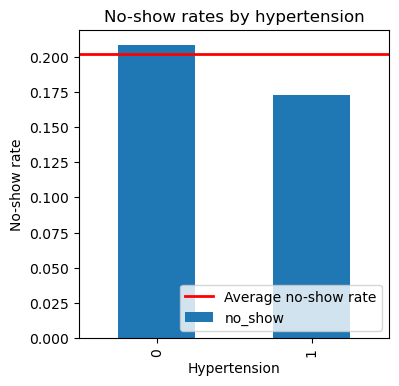

In [63]:
# plot comparison of average no-show rates for the patients with and without hypertension

barpltavgnoshow('hypertension');


> The "no-show" rates of patients with high blood pressure tend to be lower (by 19%) than those without high blood pressure. This requires further investigation but this may be linked to high blood pressure being more widespread among older people and a chronic condition requiring continuity of care.

#### Is diabetes a factor affecting "no-show" rates?

In [64]:
# compare the average no-show rates for patients with and without diabetes

avgnoshow('diabetes')

diabetes
0    0.203591
1    0.180033
Name: no_show, dtype: float64

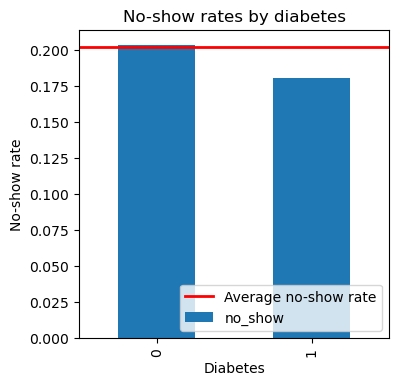

In [65]:
# plot comparison of average no-show rates for the patients with and without diabetes

barpltavgnoshow('diabetes');

> Patients with diabetes tended to have lower no-show rates (12% lower than patients without diabetes). This requires further investigation but like high blood pressure, it may be linked to the chronic nature of the health condition and the need for continuity of care.

#### Is alcoholism a factor affecting "no-show" rates?

In [66]:
# compare the average no-show rates for patients with and without alcoholism

avgnoshow('alcoholism')

alcoholism
0    0.201911
1    0.201488
Name: no_show, dtype: float64

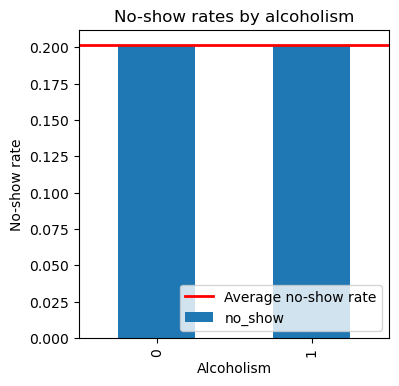

In [67]:
# plot comparison of average no-show rates for the patients with and without disability

barpltavgnoshow('alcoholism');

> There is no difference in-between the two groups. Both groups are at the overall average no-show rates.

#### Is disability a factor affecting no-show rates?


In [68]:
avgnoshow('disability_new')


disability_new
0    0.201891
1    0.206030
Name: no_show, dtype: float64

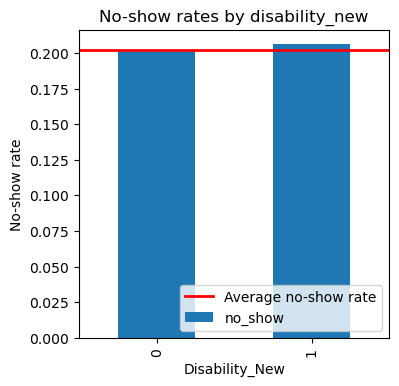

In [69]:
# plot comparison of average no-show rates for the patients with and without disability

barpltavgnoshow('disability_new');


> No association was found between disability and attendance rates. Patients with a disability, however, have a higher-than-average no-show rates. This requires further investigation into the accessibility and particular challenges persons with disabilities may face when accessing medical appointments (e.g. transportation issues).


#### Is the length of time between scheduling and the appointment a factor affecting no-show rates?

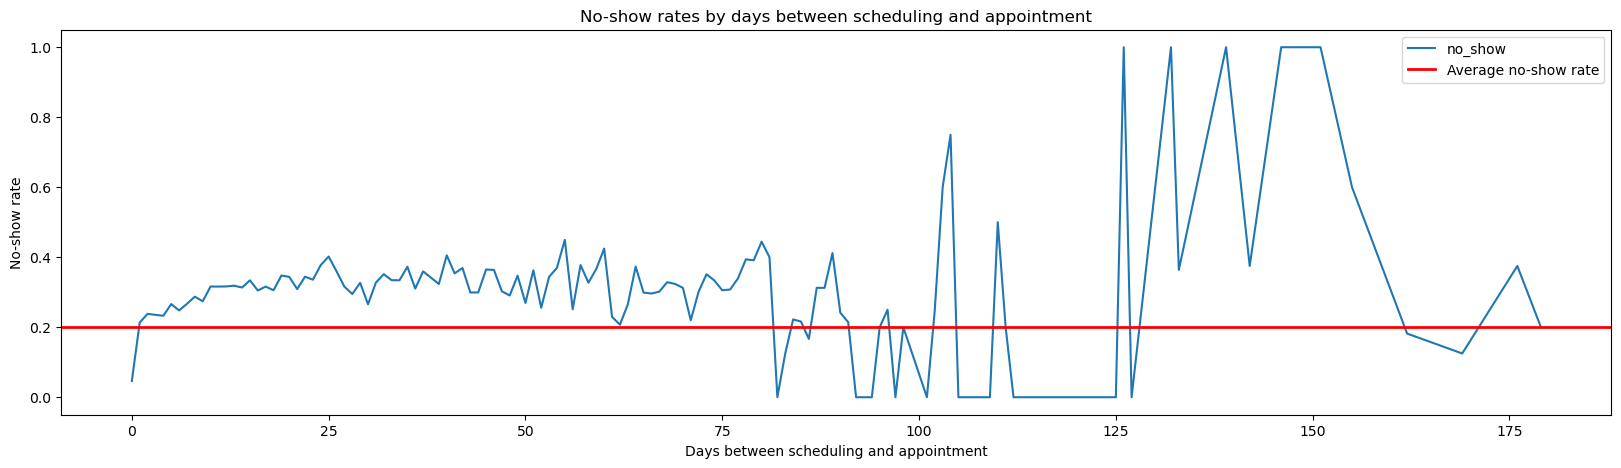

In [70]:
ax = df.groupby('diff_days').no_show.mean().plot(kind='line', figsize=[20, 5], title='No-show rates by days between scheduling and appointment')
ax.set(xlabel="Days between scheduling and appointment", ylabel="No-show rate")
ax.axhline(df.no_show.mean(), color='red', linewidth=2, label='Average no-show rate')
plt.legend();

> There is no clear pattern in the relationship between the no-show rates and the number of days between scheduling the appointment and its taking place. As expected, only the same-day appointments have a significantly lower "no-show" rates.

#### Are patients with who missed their first appointment more likely to miss another one?


In [71]:
# find number of repeat patients in the dataset

df.duplicated(subset = ['patient_id']).sum()

48223

> 48,223 patients are repeat patients. This is almost half of all 110,521 patients in the dataset - a significant number, so we should look further into it to see if we can find any no-show patterns. In particular, are patient with one no-show appointment, more likely to miss another one?

In [72]:
# Order all appointments by appointment day

df.sort_values(by='appointment_date')

,patient_id,appointment_id,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show,appointment_date,scheduling_date,diff_days,disability_new,female
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,2016-04-29,2016-04-29,0,0,1
2151,7.257760e+11,5521232,M,33,MARIA ORTIZ,0,0,0,0,1,0,2016-04-29,2016-03-29,31,0,0
2152,9.475572e+13,5521230,F,50,MARIA ORTIZ,0,0,0,0,0,0,2016-04-29,2016-03-29,31,0,1
2153,3.538755e+13,5523393,F,69,MARIA ORTIZ,0,0,0,0,1,0,2016-04-29,2016-03-29,31,0,1
2154,7.324990e+14,5642808,F,65,MARIA ORTIZ,0,0,0,0,0,0,2016-04-29,2016-04-29,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92055,6.618378e+13,5789482,M,24,MARIA ORTIZ,0,0,0,0,0,0,2016-06-08,2016-06-08,0,0,0
99217,8.242474e+13,5779081,F,54,JESUS DE NAZARETH,0,1,0,0,0,0,2016-06-08,2016-06-06,2,0,1
99218,4.137343e+12,5779077,F,50,SANTA MARTHA,0,1,0,0,0,0,2016-06-08,2016-06-06,2,0,1
99224,7.821984e+14,5779066,F,64,SANTA TEREZA,0,1,1,0,0,0,2016-06-08,2016-06-06,2,0,1


In [73]:
# group by patient id and cumulatively count the individual appointments

df['app_number'] = df.groupby('patient_id').cumcount()+1

In [74]:
#check result

df.head()

,patient_id,appointment_id,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,sms_received,no_show,appointment_date,scheduling_date,diff_days,disability_new,female,app_number
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,2016-04-29,2016-04-29,0,0,1,1
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,2016-04-29,2016-04-29,0,0,0,1
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,2016-04-29,2016-04-29,0,0,1,1
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,2016-04-29,2016-04-29,0,0,1,1
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,2016-04-29,2016-04-29,0,0,1,1


In [75]:
# check the number of appointments patients in the dataset have had

df.app_number.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88])

> There are repeat patients with 2 to 88 individual appointments in the dataset.

In [76]:
# create an array only with repeat patients

repeat_patients = df.query('app_number > 1').patient_id.unique()


In [77]:
# find the show/no-show rate for repeat patients by appointment number

df.query('patient_id in @repeat_patients').groupby('app_number')['no_show'].value_counts(normalize=True)


app_number  no_show
1           0          0.791903
            1          0.208097
2           0          0.790754
            1          0.209246
3           0          0.789182
                         ...   
84          0          1.000000
85          0          1.000000
86          0          1.000000
87          0          1.000000
88          0          1.000000
Name: no_show, Length: 136, dtype: float64

In [78]:
# unstack show/no-show

df.query('patient_id in @repeat_patients').groupby('app_number')['no_show'].value_counts(normalize=True).unstack().fillna(0)

no_show,0,1
app_number,,
1,0.791903,0.208097
2,0.790754,0.209246
3,0.789182,0.210818
4,0.771469,0.228531
5,0.764818,0.235182
...,...,...
84,1.000000,0.000000
85,1.000000,0.000000
86,1.000000,0.000000


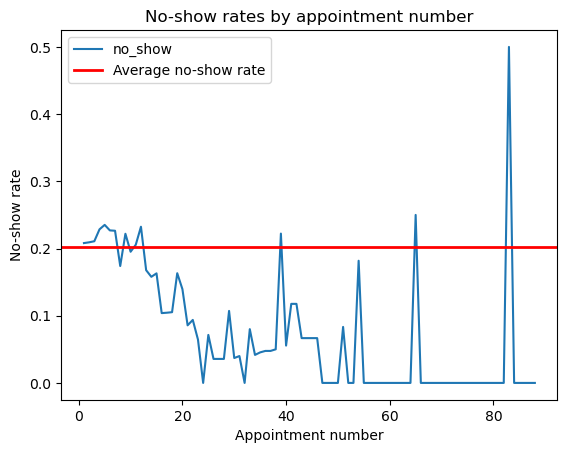

In [79]:
# visualize the "no-show" rates by appointment number

ax = df.query('patient_id in @repeat_patients').groupby('app_number')['no_show'].mean().plot(kind='line', title = 'No-show rates by appointment number')
ax.set(xlabel="Appointment number", ylabel="No-show rate")
ax.axhline(df.no_show.mean(), color='red', linewidth=2, label='Average no-show rate')
plt.legend();

> Most "no-show" appointments are the first 10, after which - with the exception of a few spikes, well below the average "no-show" rates. This may suggest that repeat patients with perhaps long-term needs (e.g. chronic conditions) have lower "no-show" rates. This reasoning is in line with the lower "no-show" rates of patients with diabetes and high blood pressure. These results are, however, preliminary and need further investigation.

In [80]:
# create an array with only the patients who missed their first appointment

repeatp_first_noshow = df.query('patient_id in @repeat_patients and app_number == 1 and no_show == 1').patient_id


In [81]:
# check result

print(repeatp_first_noshow)


7         3.449833e+12
20        6.222575e+14
21        1.215484e+13
49        9.223559e+13
50        1.827172e+14
              ...     
108926    6.148570e+10
109768    5.183318e+12
110291    4.994689e+13
110383    2.957279e+12
110385    7.631646e+13
Name: patient_id, Length: 5073, dtype: float64


In [82]:
# create a new array with the following appointments of patients who missed their first appointment

repeat_noshow = df.query('patient_id in @repeatp_first_noshow and app_number > 1')


In [83]:
# find the number of repeat patients who missed their first appointment

repeat_noshow.patient_id.nunique()


5073

> 5,073 patients missed their first appointment. The sample is big enough to use it for analysis.

In [84]:
# find the average no-show rate for patients who missed their first appointment

repeat_noshow_avg = repeat_noshow.no_show.mean()
print(repeat_noshow_avg)

0.30901639344262294


In [85]:
# find the average no-show rate for the rest of the patients (who didn't miss their first appointment)
# create an array with repeat patients who didn't miss their first appointment

repeat_show = df.query('patient_id not in @repeatp_first_noshow and app_number > 1')


In [86]:
# find the average no-show rate for patients who didn't miss their first appointment

repeat_show_avg = repeat_show.no_show.mean()
print(repeat_show_avg)

0.18474897953877753


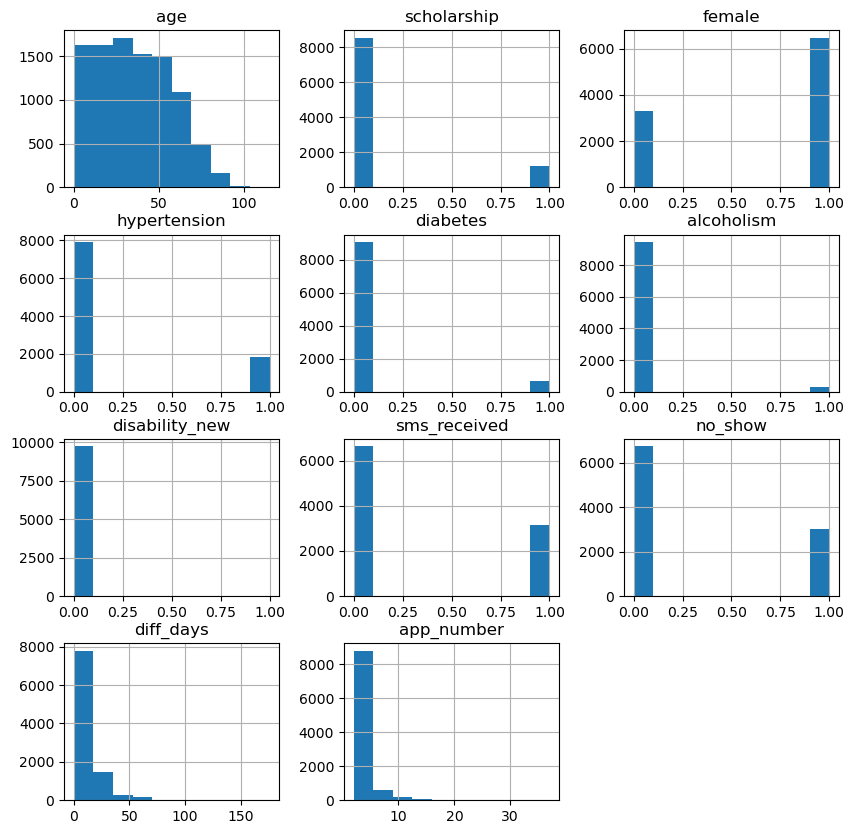

In [87]:
# check for different characteristics between the two groups

repeat_noshow.hist(column=['age', 'scholarship', 'female', 'hypertension', 'diabetes', 'alcoholism', 'disability_new', 'sms_received', 'no_show', 'diff_days', 'app_number'], figsize=(10,10));


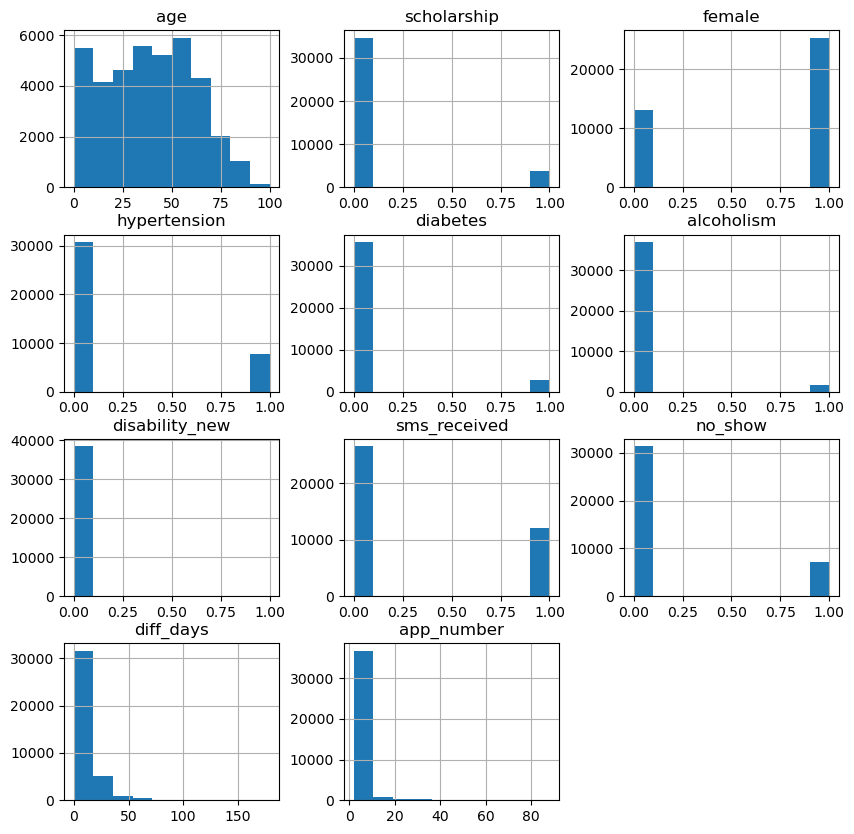

In [88]:
repeat_show.hist(column=['age', 'scholarship', 'female', 'hypertension', 'diabetes', 'alcoholism', 'disability_new', 'sms_received', 'no_show', 'diff_days', 'app_number'], figsize=(10,10));


> There aren't signficant differences in the distribution between the two groups to take into account in the analysis.

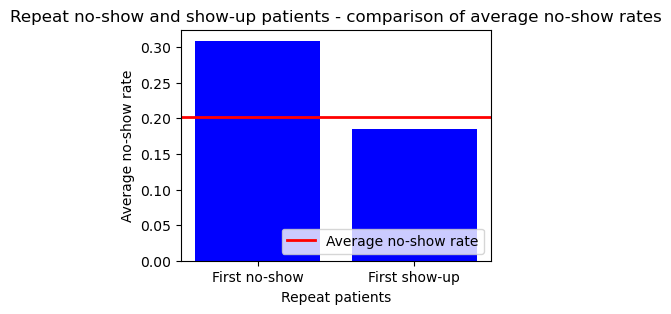

In [89]:
# plot the two groups' average no-show rates to visualize the differences

data = {'repeat_noshow_avg':repeat_noshow_avg, 'repeat_show_avg':repeat_show_avg}
repeat_patients = list(data.keys())
noshow_avg = list(data.values())
  
fig = plt.figure(figsize = (4, 3))
plt.bar(repeat_patients, noshow_avg, color ='blue') 
plt.xlabel("Repeat patients")
plt.ylabel("Average no-show rate")
plt.title("Repeat ""no-show"" and ""show-up"" patients - comparison of average no-show rates")
plt.axhline(df.no_show.mean(), color='red', linewidth=2, label='Average no-show rate');
plt.xticks(np.arange(2), ['First no-show', 'First show-up'])
plt.legend(loc='lower right')
plt.show();


> The difference in the no-show rate between the repeat patients who missed their first appointment and those who didn't is substantial: 50%. This finding is important in showing that if a patient has a "no-show" apponitment, this may be an indicator that they are more likely to miss another one. Additional measures may need to be taken for such patients to prevent repeat "no-shows".


#### Is receiving a reminder a factor affecting no-show rates?


In [90]:
# compare average no-show rates for the groups who received an SMS reminder with those who didn't

df.groupby('sms_received').no_show.mean()

sms_received
0    0.166980
1    0.275745
Name: no_show, dtype: float64

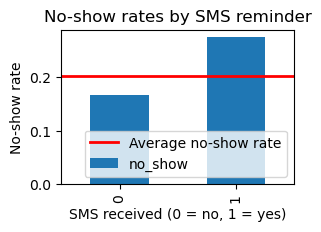

In [91]:
# plot comparison of average no-show rates for the groups who received an SMS reminder with those who didn't

ax = df.groupby('sms_received').no_show.mean().plot(kind='bar', figsize=[3, 2], title='No-show rates by SMS reminder');
ax.set(xlabel="SMS received (0 = no, 1 = yes)", ylabel="No-show rate");
ax.axhline(df.no_show.mean(), color='red', linewidth=2, label='Average no-show rate')
plt.legend(loc='lower right');

> Surprisingly, the patients who received an SMS reminder have significantly higher "no-show" rates than those who did not receive one. This may be linked to the number of same-day appointments (e.g. urgencies or walk-in appointments) that are skewing the results. Let's check.

In [92]:
# compare average no-show rates for the groups who received an SMS reminder with those who didn't, 
# excluding same-day appointments

df.query('diff_days > 0').groupby('sms_received').no_show.mean()


sms_received
0    0.294377
1    0.275745
Name: no_show, dtype: float64

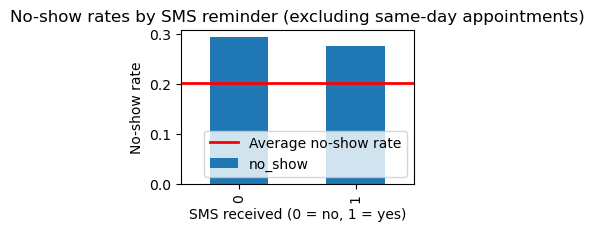

In [93]:
# plot comparison of average no-show rates for the groups who received an SMS reminder with those who didn't
# when the difference in days is above 0

ax = df.query('diff_days > 0').groupby('sms_received').no_show.mean().plot(kind='bar', figsize=[3, 2], title='No-show rates by SMS reminder (excluding same-day appointments)');
ax.set(xlabel="SMS received (0 = no, 1 = yes)", ylabel="No-show rate");
ax.axhline(df.no_show.mean(), color='red', linewidth=2, label='Average no-show rate')
plt.legend(loc='lower right');

> This result makes more sense but the differences are smaller than I would have expected. We need more data to see why the reminders do not have a bigger effect and how they can be made more effective.

#### Is the hospital's neighbourhood a factor affecting no-show rates?


In [94]:
# find the hospitals with above-average no-show rates
# calculate the dataframe's average no-show rates
mean_noshow = df.no_show.mean()
mean_noshow

0.2018982817745044

In [95]:
# list the hospitals with above-average no-show rates

hospital_by_noshow = df.groupby('neighbourhood').no_show.mean()

hospital_by_noshow[hospital_by_noshow > mean_noshow]


neighbourhood
ANDORINHAS                     0.230327
ARIOVALDO FAVALESSA            0.219858
BARRO VERMELHO                 0.215130
BENTO FERREIRA                 0.224942
CARATOÍRA                      0.230409
CENTRO                         0.210858
CRUZAMENTO                     0.217454
DO MOSCOSO                     0.222760
ENSEADA DO SUÁ                 0.221277
FONTE GRANDE                   0.218475
GRANDE VITÓRIA                 0.202614
GURIGICA                       0.225966
HORTO                          0.240000
ILHA DAS CAIEIRAS              0.219421
ILHA DO PRÍNCIPE               0.234775
ILHAS OCEÂNICAS DE TRINDADE    1.000000
ITARARÉ                        0.262664
JESUS DE NAZARETH              0.243954
MARIA ORTIZ                    0.209991
MARUÍPE                        0.222923
NAZARETH                       0.214815
PARQUE MOSCOSO                 0.223192
PRAIA DO SUÁ                   0.228261
RESISTÊNCIA                    0.204289
ROMÃO                     

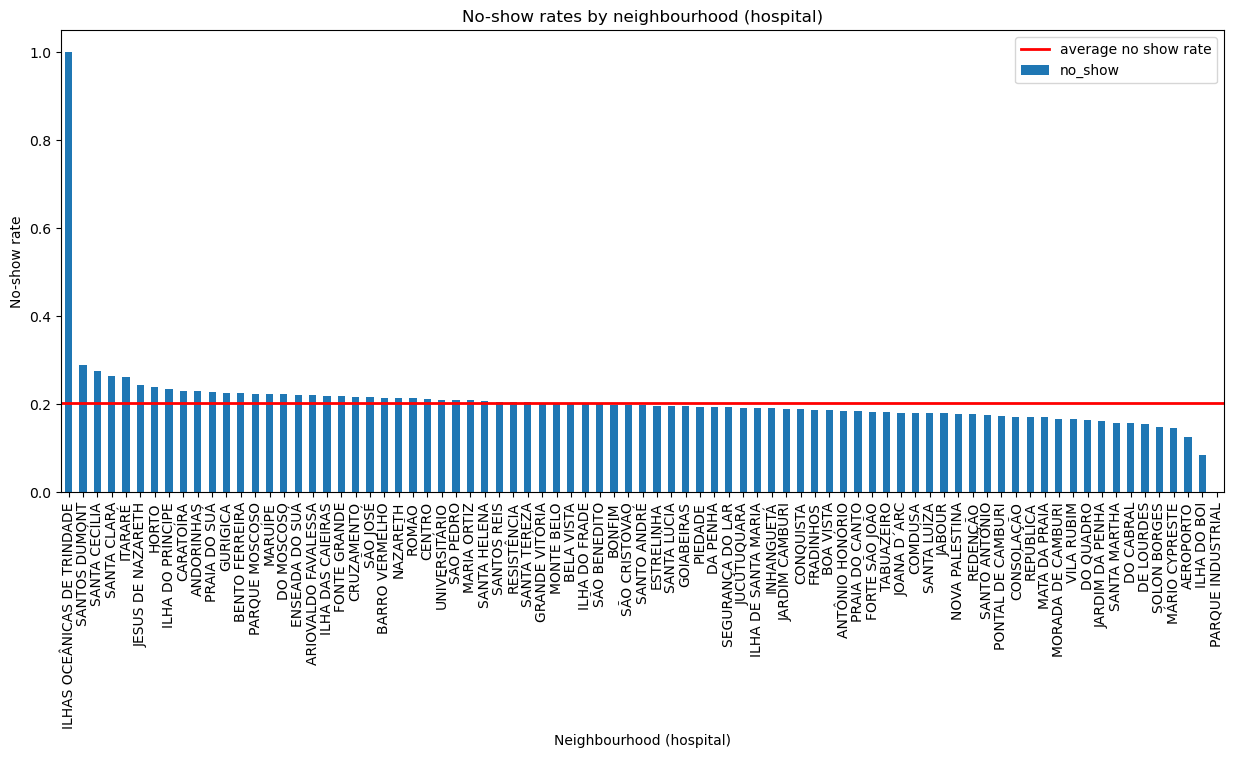

In [96]:
# show all hospitals, including those with above-average no-show rates 

ax = df.groupby('neighbourhood').no_show.mean().sort_values(ascending=[False]).plot(kind='bar', figsize=[15, 6], title = 'No-show rates by neighbourhood (hospital)')
ax.set(xlabel="Neighbourhood (hospital)", ylabel="No-show rate")
ax.axhline(df.no_show.mean(), color='red', linewidth=2, label = "average no show rate")
plt.legend();


> 34 out of the 81 hospitals have no-show rates higher than the average of 20%. It is important to look into the underlying factors for their higher-than-average no-show rates, so they can be addressed.

<a id='conclusions'></a>
## Conclusions


Based on the available data, we can conclude that the following factors are important to know to predict if a patient will show up for their scheduled appointment.


### Patient characteristics

##### Gender
> Women tend to have higher "no-show" rates than men and are over the average "no-show" rates. There does not appear to be a strong association between gender and attendance rates, however, women's no-show rates being only 2% higher than men's. 

##### Age
> Younger people tend to have higher “no-show” rates, but again the difference appears small.

##### Social support
> Members of the Bolsa Familia social welfare program have 18% higher no-show rates. It's important to understand what obstacles to attending medical appointments beneficiaries of social support may face.

##### Health condition: high blood pressure and diabetes
> The "no-show" rates of patients with high blood pressure tend to be lower (by 19%) than those without high blood pressure. This requires further investigation but may be linked to high blood pressure being more widespread among older people and being a chronic condition requiring continuous care.

> Similarly, patients with diabetes tend to have lower no-show rates (12% lower than patients without diabetes). This requires further investigation but like high blood pressure, it may be linked to the chronic nature of diabetes and the need for continuity of care.

##### Disability
> No strong association was found between disability and attendance rates. Patients with a disability, however, have a higher-than-average no-show rates. This requires further investigation into the accessibility and particular challenges persons with disabilities may face when accessing medical appointments (e.g. transportation issues).

##### Repeat patients

> The difference in the no-show rate between the repeat patients who missed their first appointment and those who didn't is substantial: 50%. This finding is important in showing that if a patient has one "no-show" appointment, this may be an indicator that they are more likely to miss another one. Additional measures may need to be taken for such patients to prevent repeat "no-shows".

##### Alcoholism
> There is no difference in-between the two groups. Both groups are at the overall average no-show rates. 

##### Frequency of appointment
 > Most "no-show" appointments are the first 10, after which - with the exception of a few spikes, well below the average "no-show" rates. This may suggest that repeat patients with long-term needs (e.g. chronic conditions) and high frequency of appointments have lower "no-show" rates. This reasoning is in line with the lower "no-show" rates of patients with diabetes and high blood pressure. These results are, however, preliminary and need further investigation.


### Appointment characteristics

##### Hospital location (neighborhood)
> 34 out of the 81 hospitals have no-show rates higher than the average of 20%. It is important to look into the underlying factors for their higher-than-average no-show rates, so they can be addressed.

##### SMS reminder 
> The differences are rather limited. It would be worthwhile to find more data on reminders to see why they have now had a bigger effect and how they can be made more effective.

##### Length of time between the scheduling day and the appointment day
> There is no clear pattern in the relationship between the no-show rates and the number of days between scheduling the appointment and its taking place. As expected, only the same-day appointments have significantly lower "no-show" rates.

### Limitations
> This is an **initial analysis using descriptive statistics** that is only the first step towards buliding a prediction model for patient "no-shows". The next steps would involve statistical modelling, for example using a regression model.

> A **more complete picture will emerge** if the analysis includes data on type of appointment (e.g. general practitioner vs specialist), ethnicity and culture, and weather patterns which all may affect "no-show" rates. (Liu, D., Shin, WY., Sprecher, E. et al. Machine learning approaches to predicting no-shows in pediatric medical appointment. npj Digit. Med. 5, 50 (2022). https://doi.org/10.1038/s41746-022-00594-w)


